# Project-008-2 Heart Disease 

### Predicting Heart Disease Diagnosis

### Introduction 

The cardiovascular system encompasses an intricate network of blood vessels, including veins, arteries, and capillaries, which facilitate the circulation of blood throughout the body. Any disruptions in the flow of blood emanating from the heart can lead to various forms of heart diseases, collectively referred to as cardiovascular or heart diseases. Globally, heart diseases constitute a leading cause of mortality - the World Health Organization (WHO) indicates that approximately 17.5 million deaths annually are attributable to heart attacks and strokes. Consequently, the early detection of cardiac anomalies is imperative as it can significantly save lives and assist healthcare professionals in crafting effective treatment strategies. 

In this study, we will examine a dataset that contains test results from 303 patients referred for coronary angiography at the Cleveland Clinic in Ohio between May 1981 and September 1984. All the patients had similar medical profiles and underwent the same non-invasive tests, namely, exercise electrocardiogram, exercise thallium scintigraphy and fluoroscopy for coronary calcium. 

The clinical and test variables included in this dataset are per the below, while the target variable is the angiographic disease status `num`, where the value 0 corresponds to the major vessels showing less than 50% narrowing of the vessels diameter while the value 1 corresponds to showing greater than 50% narrowing of the vessels diameter.<br>

* Clinical
    - `age` (in years)
    - `sex`  <br>
 1 = male  <br>
 0 = female <br>
  - `cp`: Chest Pain Type <br>
 1 = typical anginal <br>
 2 = atypical anginal <br>
 3 = nonanginal <br>
 4 = asymptomatic 
  - `trestbps`: Systolic Blood Pressure (in mmHg on admission to the hospital) 
* Routine Test Data Collected  
    - `chol`: Serum cholesterol determination (in mg/dl) 
    - `fbs`: Fasting blood sugar determination (fasting blood sugar > 120 mg/dl) <br>
	1 = true <br>
	0 = false <br>
   - `reastecg`: Resting electrocardiographic results <br>
	0 = normal <br>
	1 = having ST-T wave abnormality <br>
	2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria  <br>
* Exercise Test Data Collected 
    - `thalach`: Maximum heart rate achieved (beats per minute)
    - `exang`: Exercise induced angina <br> 
	1 = yes <br>
	0 = no <br>
   - `oldpeak`: ST depression induced by exercise relative to rest
   - `slope`: Slope of the peak exercise ST segment <br>
	1 = upsloping <br>
	2 = flat <br>
	3 = downsloping <br> 
* Other Non-invasive Test Data Collected
   - `ca`: Number of major vessels colored by fluoroscopy for coronary calcium (0 - 3)
   - `thal`: Exercise thallium scintigraphy results <br>
	3 = normal <br>
	6 = fixed defect <br>
	7 = reversible defect <br>

In this study, we will address the predictive question: "Can we use clinical and test data available to us to predict a diagnosis of heart disease?" This is important as it provides a quick and data-driven method to diagnose heart disease and eliminates subjectivity and dependence on the skill and experience of the diagnosing physician. 


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


### Preliminary Exploratory Data Analysis

In [2]:
heart_disease <- read_csv("processed.cleveland.data", col_names = FALSE)
colnames(heart_disease) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_disease

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


As part of the exploratory data analysis, we will split the data into a training and test set, with `num` being the variable we want to classify.

In [3]:
heart_disease_split <- initial_split(heart_disease , prop = 0.75, strata = num)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test<- testing(heart_disease_split)
heart_disease_train

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,0,4,128,205,0,1,130,1,2.0,2,1.0,7.0,3
58,1,4,114,318,0,1,140,0,4.4,3,3.0,6.0,4
59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,3


The dataset appears to be clean and wrangled into a tidy format with the addition of the column headers. 
However, the two columns `ca` and `thal` appear to contain missing values signified by a question mark "?" character. We shall filter the training dataset so that all the rows with missing values are eliminated. We will also change the type of the `ca` variable from to numeric so we can use numeric analysis methods on it.

In [4]:
heart_disease_train_filtered <- filter(heart_disease_train, ca != "?", thal != "?") |> mutate(ca = as.numeric(ca))

heart_disease_train_filtered

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,0
57,0,4,120,354,0,0,163,1,0.6,1,0,3.0,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,0,4,128,205,0,1,130,1,2.0,2,1,7.0,3
58,1,4,114,318,0,1,140,0,4.4,3,3,6.0,4
59,1,4,164,176,1,2,90,0,1.0,2,2,6.0,3


We can summarize the data in the table below showing the number of observations in each class and the means of the predictor variables we plan to use. Please note that our predictor variables may change as we continue with our data analysis. An explanation of the predictor variables that we plan to use in our analysis and our chosen models follows in the Methods section.

In [5]:
heart_disease_train_summary <- heart_disease_train_filtered |>
    summarise( 
        count = n(),
        mean_age = mean(age),
        mean_trestbps = mean(trestbps),
        mean_chol = mean(chol),
        mean_thalach = mean(thalach),
        mean_oldpeak = mean(oldpeak),
        mean_ca = mean(ca)
        )
heart_disease_train_summary        

count,mean_age,mean_trestbps,mean_chol,mean_thalach,mean_oldpeak,mean_ca
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
221,54.65158,132.0588,246.9367,149.8688,1.075566,0.7058824


Based on the above, we are able to produce the following visualization which compares the distributions of each of the predictor variables we plan to use in our analysis.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


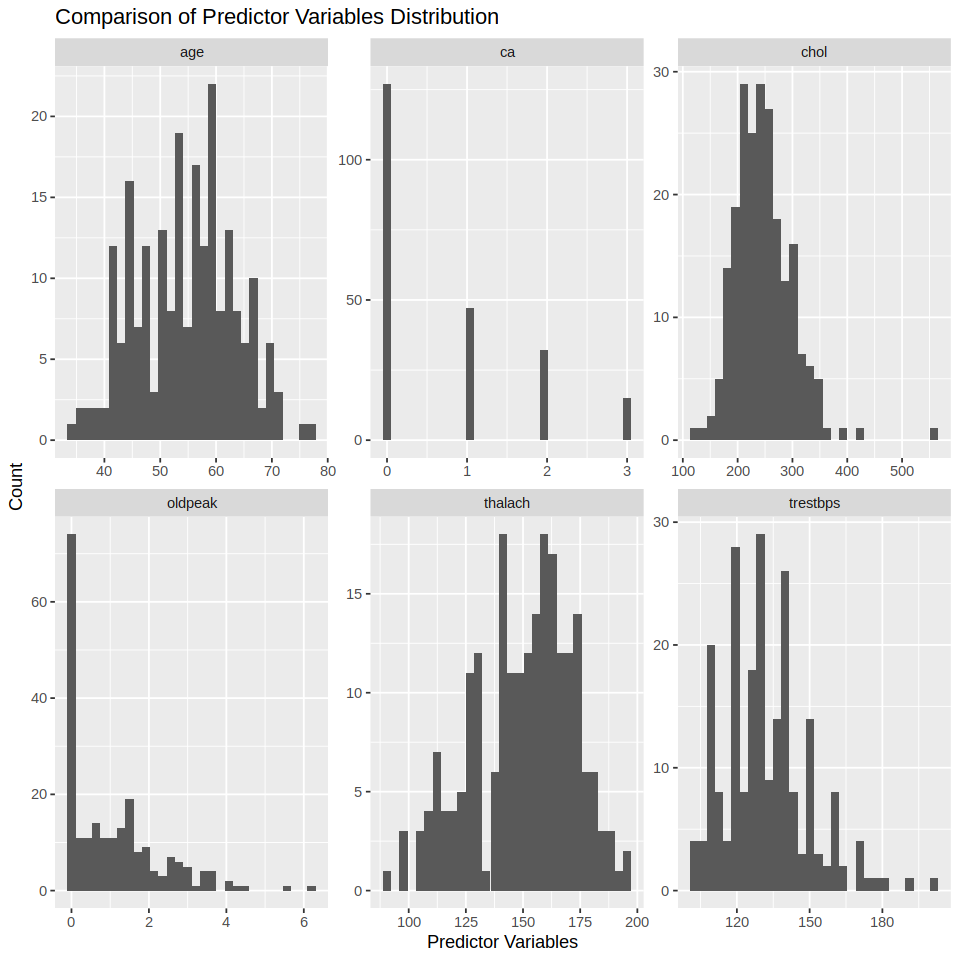

In [7]:
options(repr.plot.width = 8, repr.plot.height = 8)

heart_disease_train_predict <- select(heart_disease_train_filtered, age, trestbps, chol, thalach, oldpeak, ca)

long_data <- pivot_longer(heart_disease_train_predict, cols = everything(), names_to = "predictor_variables", values_to = "value")

heart_disease_train_hist <- ggplot(long_data, aes(x = value)) +
    geom_histogram(position = "identity") +
    facet_wrap(~predictor_variables, scales = "free") +
    labs(title = "Comparison of Predictor Variables Distribution", x = "Predictor Variables", y = "Count")

heart_disease_train_hist

### Methods 
For this project, we will conduct a classification prediction using the six non-categorical variables included in the above summary tables. That is since categorical variables are not on any scale, and can cause confusion as a predictor, it is better that this
study excludes categorical variables as predictors. Numeric variables will be separated in to groups based on their relationship with the target variable, then we will create several candidate classification models and find the one with highest accuracy to apply for the prediction. 

At this moment, we will likely create three classification models grouped by the testing data techniques. For example, one model will include `age`, `trestbps`, and `chol` as they are all either clinical or routine test data results, another model will include `thalach` and `oldpeak` as they are exercise induced data results, and lastly `ca` could be in its own model as it refers to the fluoroscopy for coronary calcium results.



An example of a sample visualization is included below.



In [18]:
clinical_routine_test_data <- select(heart_disease_train_filtered, age, trestbps, chol)
clinical_routine_test_data 

age,trestbps,chol
<dbl>,<dbl>,<dbl>
37,130,250
57,120,354
57,140,192
⋮,⋮,⋮
55,128,205
58,114,318
59,164,176


In [11]:
exercise_incuded_data <- select (heart_disease_train_filtered, thalach, oldpeak)
exercise_incuded_data

thalach,oldpeak
<dbl>,<dbl>
187,3.5
163,0.6
148,0.4
⋮,⋮
130,2.0
140,4.4
90,1.0


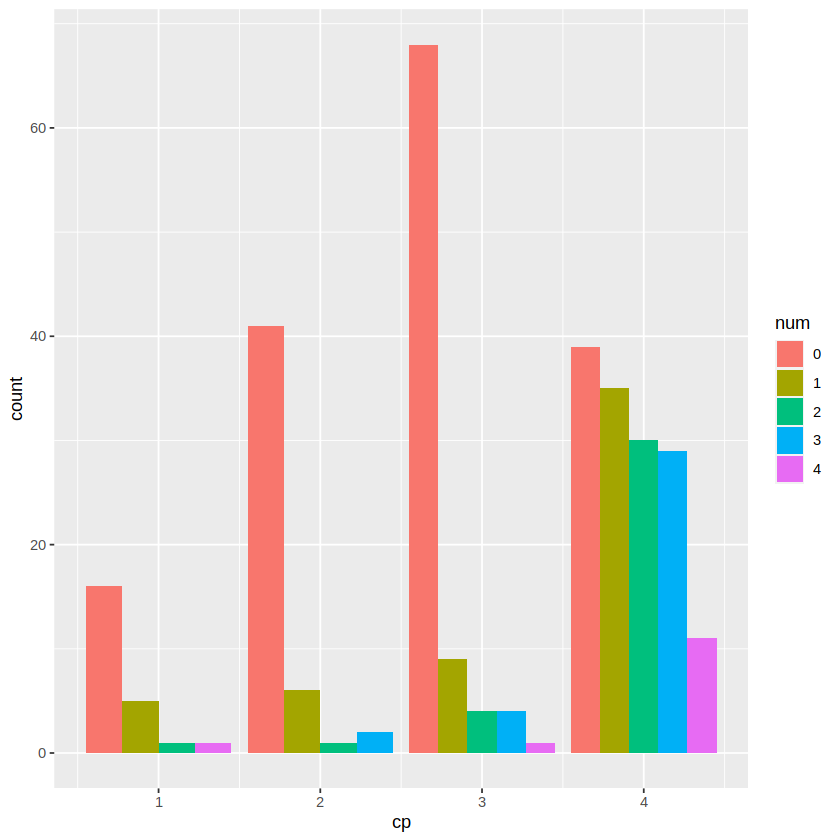

In [12]:
heart_disease <- mutate(heart_disease, num = as.factor(num))
heart_disease_plot <- heart_disease |>
ggplot(aes (x = cp, fill = num)) +
geom_bar(position = "dodge")
heart_disease_plot
#The plot shows that people with type 4 chest pain (asymptomatic, so actually no chest pain) are more likely to be diagnosed with cancer